<a href="https://colab.research.google.com/github/andreviniciusmb/ia_ic/blob/main/ProjetoIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Inteligência Computacional
O problema escolhido foi referente a previsão de empréstimo com base no comportamento do cliente, então o objetivo aqui será prever quem são os possíveis inadimplentes para um produto de empréstimos ao consumidor, o dataset e a descrição podem ser acessados neste <a href='https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior'>link</a>.

## Bibliotecas

In [1]:
# Bibliotecas para manipulação de dados e operações matemáticas
import pandas as pd
import numpy as np
from scipy import stats

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de pré processamento, validação e avaliação de modelos
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix,classification_report

# Bibliotecas de Modelos machine Learning
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas auxiliares
import warnings 

## Seleção e apresentação da base de dados
A base de dados contém 92.704 linhas e 13 colunas.

In [2]:
data = pd.read_csv('Training Data.csv')
print(data.shape)
data.head()

(118907, 13)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0


 ## Limpeza e tratamento dos dados
O dataset tem apenas 1 informação nula e como alternativa para tratá-la, toda a linha daquela informação será removida.

In [3]:
data.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                1
CURRENT_JOB_YRS      1
CURRENT_HOUSE_YRS    1
Risk_Flag            1
dtype: int64

In [4]:
data.dropna(axis=0,inplace=True)

In [5]:
data.shape

(118906, 13)

## Análise Exploratória dos Dados

79922 (86.21%) pessoas foram classificadas como sem risco para inadiplência, enquanto 12.781 (13.79%) foram classificadas como risco para inadiplência.

0: 79922 = 86.21%
1: 12781 = 13.79%


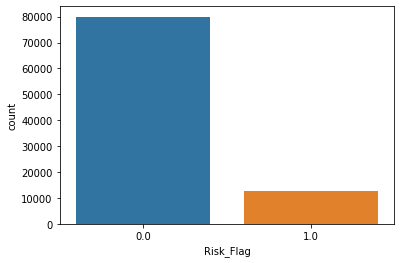

In [ ]:
tam_classe0 = len(data[data['Risk_Flag'] == 0])
tam_classe1 = len(data[data['Risk_Flag'] == 1])
tam_total = len(data)
print('0: {} = {:.2f}%\n1: {} = {:.2f}%'.format(tam_classe0,tam_classe0/tam_total*100,
                                             tam_classe1,tam_classe1/tam_total*100))
sns.countplot(x=data['Risk_Flag'])

Pode-se ver que há uma pequena diferença na renda de quem foi inadiplente e quem não foi.

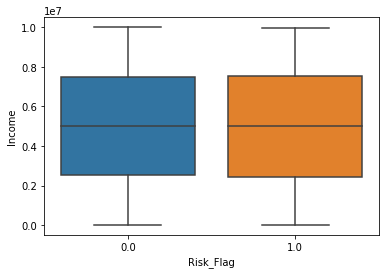

In [ ]:
sns.barplot(y=data['Income'],x=data['Risk_Flag'])
plt.ylim(4.4e6,5.4e6)

Não há uma diferença expressiva entre a idade das classes de risco de inadiplência.

In [ ]:
data[data['Risk_Flag'] == 0]['Age'].describe()

count    79922.000000
mean        50.150835
std         17.008736
min         21.000000
25%         35.000000
50%         50.000000
75%         65.000000
max         79.000000
Name: Age, dtype: float64

In [ ]:
data[data['Risk_Flag'] == 1]['Age'].describe()

count    12781.000000
mean        49.015961
std         17.304496
min         21.000000
25%         33.000000
50%         49.000000
75%         64.000000
max         79.000000
Name: Age, dtype: float64

Os casos de inadiplência ocorrem em maior número envolvendo pessoas solteiras.

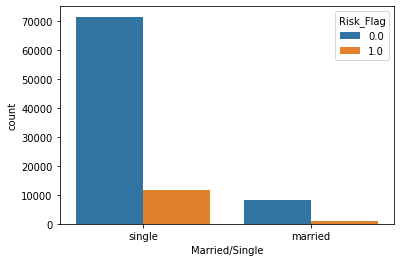

In [ ]:
sns.countplot(x=data['Married/Single'], hue=data['Risk_Flag'])

Tem-se um maior número de inadiplentes com pessoas que não possuem um veículo próprio.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


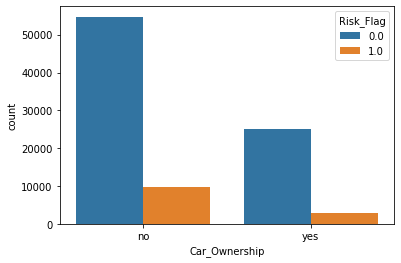

In [ ]:
sns.countplot(data['Car_Ownership'], hue=data['Risk_Flag'])

Pode-se analisar que a maioria dos inadiplentes sde encontram entre 20 e 30 anos, não tendo a experiencia como fator decisivo.

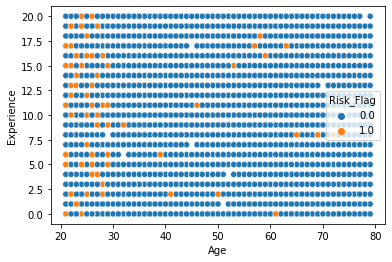

In [7]:
sns.scatterplot(x='Age',y='Experience',data=data,hue='Risk_Flag')

Não há uma diferença significativa, mas pode-se perceber um aumento no número de inadiplentes em pessoas até 30 anos.

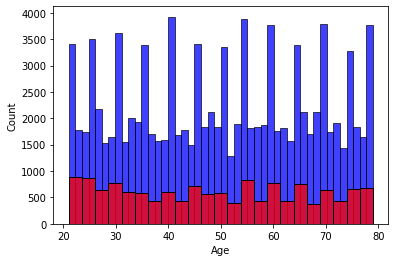

In [12]:
sns.histplot(x=data.loc[data['Risk_Flag'] == 0]['Age'],color='b')
sns.histplot(x=data.loc[data['Risk_Flag'] == 1]['Age'],color='r')

## Correlação

In [ ]:
data.dtypes

Id                     int64
Income                 int64
Age                    int64
Experience           float64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS      float64
CURRENT_HOUSE_YRS    float64
Risk_Flag            float64
dtype: object

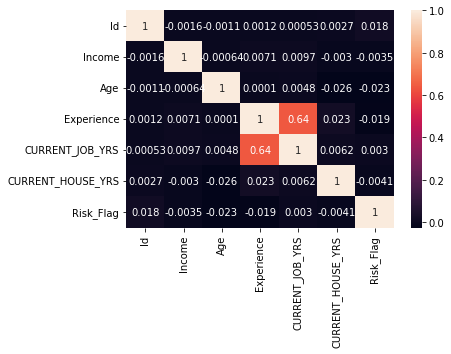

In [ ]:
sns.heatmap(data.corr(), annot=True);